# Predictive Maintenance of Hydraulics System

[https://www.kaggle.com/mayank1897/condition-monitoring-of-hydraulic-systems](https://www.kaggle.com/mayank1897/condition-monitoring-of-hydraulic-systems)

In [3]:
import multiprocessing
import pandas as pd
import seaborn as sns
import numpy as np
import tqdm


## Data loading

### Attributes

In [4]:
def make_pressure_dataframe(fp, cycle_id=0):
    seqs = np.array([np.loadtxt(fp + f'/PS{i+1}.txt.gz')[cycle_id] for i in range(6)]).T
    return pd.DataFrame(seqs, columns=[f'PS{i+1}' for i in range(6)])

In [5]:
df_ps = make_pressure_dataframe('../data/hydsys', cycle_id=0)
df_ps

,PS1,PS2,PS3,PS4,PS5,PS6
0,151.47,125.50,2.305,0.0,9.936,9.818
1,151.45,125.39,2.305,0.0,9.947,9.823
2,151.52,125.40,2.336,0.0,9.964,9.844
3,151.27,125.03,2.578,0.0,9.989,9.861
4,150.80,124.05,2.977,0.0,9.996,9.877
...,...,...,...,...,...,...
5995,151.16,124.91,2.383,0.0,9.715,9.599
5996,151.14,124.98,2.328,0.0,9.736,9.620
5997,151.10,125.11,2.250,0.0,9.745,9.639
5998,151.21,125.14,2.250,0.0,9.740,9.634


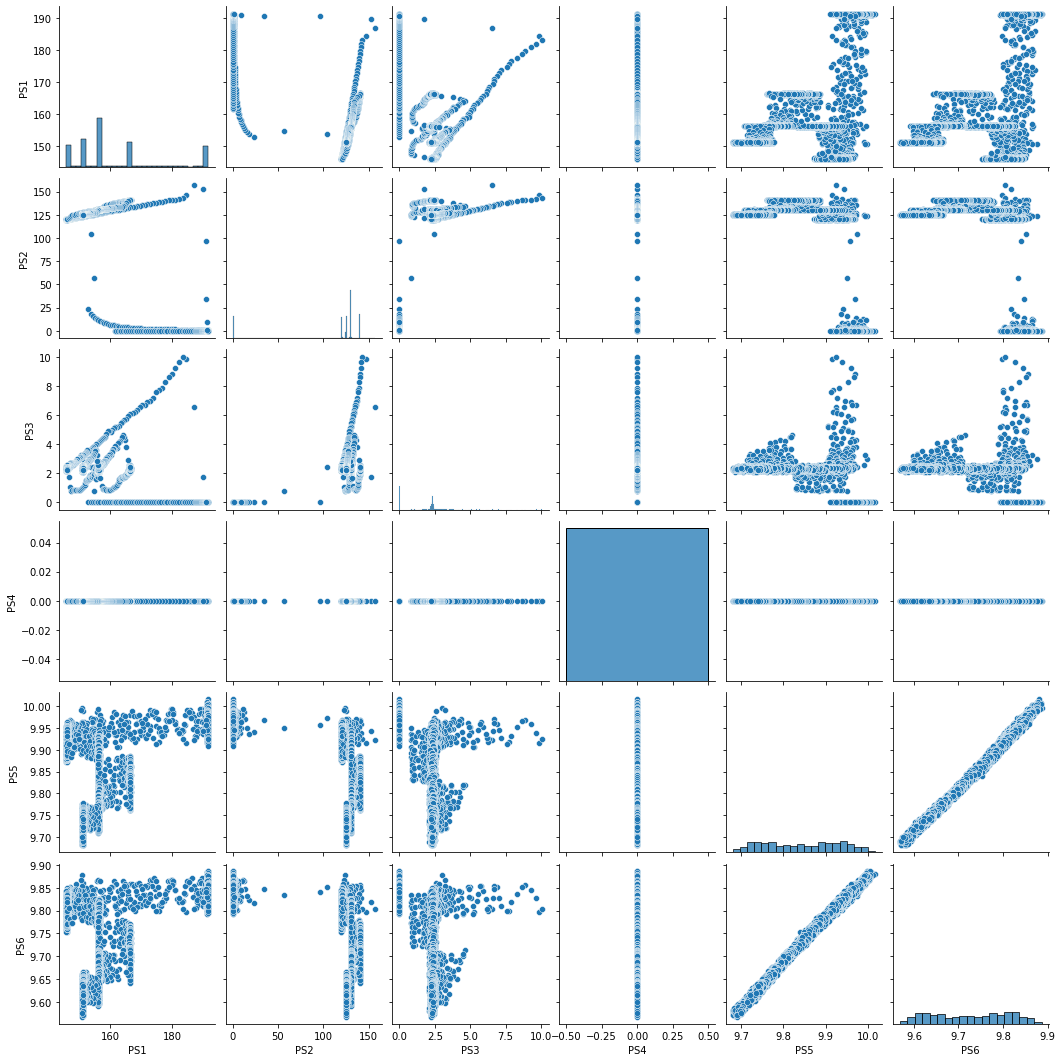

In [16]:
sns.pairplot(data=df_ps)

In [ ]:
def make_

### The target condition values

- Cooler condition / %:
    - 3: close to total failure
    - 20: reduced effifiency
    - 100: full efficiency
- Valve condition / %:
    - 100: optimal switching behavior
    - 90: small lag
    - 80: severe lag
    - 73: close to total failure
- Internal pump leakage:
    - 0: no leakage
    - 1: weak leakage
    - 2: severe leakage
- Hydraulic accumulator / bar:
    - 130: optimal pressure
    - 115: slightly reduced pressure
    - 100: severely reduced pressure
    - 90: close to total failure
- stable flag:
    - 0: conditions were stable
    - 1: static conditions might not have been reached yet

In [13]:
def make_condition_dataframe(fp):
    return pd.DataFrame(np.loadtxt(fp + '/profile.txt'),
        columns=[
            'cooler_condition',
            'valve_condition',
            'internal_pump_leakage',
            'hydraulic_accumulator',
            'stable_flag']).reset_index().rename(
                columns={'index': 'cycle'})

In [64]:
df_pf = make_condition_dataframe('../data/hydsys')
df_pf

,cycle,cooler_condition,valve_condition,internal_pump_leakage,hydraulic_accumulator,stable_flag
0,0,3.0,100.0,0.0,130.0,1.0
1,1,3.0,100.0,0.0,130.0,1.0
2,2,3.0,100.0,0.0,130.0,1.0
3,3,3.0,100.0,0.0,130.0,1.0
4,4,3.0,100.0,0.0,130.0,1.0
...,...,...,...,...,...,...
2200,2200,100.0,100.0,0.0,90.0,0.0
2201,2201,100.0,100.0,0.0,90.0,0.0
2202,2202,100.0,100.0,0.0,90.0,0.0
2203,2203,100.0,100.0,0.0,90.0,0.0


<AxesSubplot:>

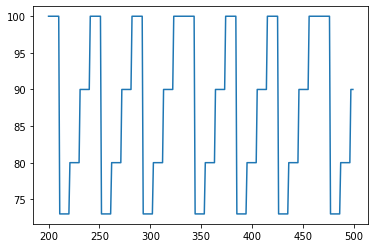

In [73]:
# df_pf.iloc[200:500].stable_flag.plot()
df_pf.iloc[200:500].valve_condition.plot()